# Sentinel Data download automated

## Load libs

In [54]:
from sentinelsat import SentinelAPI, geojson_to_wkt
import geopandas as gpd
from shapely.geometry import Polygon, mapping
from datetime import date
import json

import openeo

import rasterio
import numpy as np
import matplotlib.pyplot as plt

import xarray

In [24]:
connection = openeo.connect("openeofed.dataspace.copernicus.eu")

In [25]:
connection.authenticate_oidc()

Visit https://identity.dataspace.copernicus.eu/auth/realms/CDSE/device?user_code=VVII-FJVJ 📋 to authenticate.

✅ Authorized successfully

Authenticated using device code flow.


<Connection to 'https://openeofed.dataspace.copernicus.eu/openeo/1.2/' with OidcBearerAuth>

## Read GeoJSON

<Axes: >

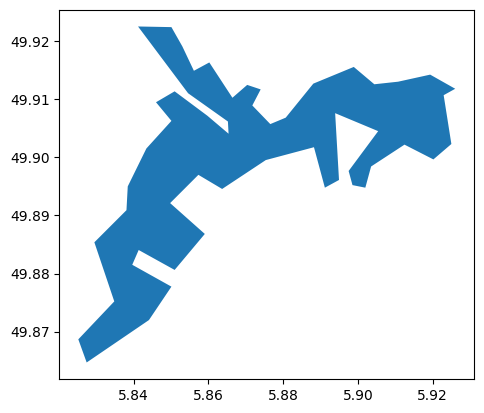

In [8]:
# Load your AOI polygon (GeoJSON)
gdf = gpd.read_file("./data/lake_haut_sure_aoi.geojson")

gdf.plot()

In [38]:
polygon_coords = [[
    [5.922901,49.910716],[5.925991,49.911822],[5.919296,49.914256],[5.910713,49.913039],
    [5.904362,49.912597],[5.898869,49.915583],[5.888054,49.912707],[5.880672,49.906845],
    [5.876553,49.905739],[5.871746,49.908947],[5.873978,49.911712],[5.870373,49.912486],
    [5.866425,49.910274],[5.860245,49.916357],[5.856125,49.914919],[5.853035,49.919122],
    [5.850117,49.922439],[5.84119,49.92255],[5.85458,49.911048],[5.865223,49.906181],
    [5.865395,49.904079],[5.85973,49.907177],[5.850975,49.91138],[5.845997,49.9095],
    [5.850117,49.906292],[5.843422,49.901535],[5.838444,49.895007],[5.8381,49.890913],
    [5.829517,49.88538],[5.834839,49.875198],[5.825226,49.868666],[5.827457,49.864681],
    [5.844109,49.871988],[5.850117,49.877743],[5.839645,49.881507],[5.841362,49.884052],
    [5.850975,49.880621],[5.859043,49.886819],[5.849773,49.89213],[5.857327,49.896999],
    [5.863678,49.894565],[5.875351,49.899543],[5.888226,49.901756],[5.891144,49.894786],
    [5.89492,49.896114],[5.89389,49.907619],[5.905392,49.904522],[5.897495,49.897663],
    [5.898525,49.895229],[5.901958,49.894786],[5.903503,49.898437],[5.91243,49.902199],
    [5.920155,49.899654],[5.924961,49.902309],[5.922901,49.910716]
]]

geometry = {
    "type": "Polygon",
    "coordinates": polygon_coords,
    "crs": {"type": "name", "properties": {"name": "EPSG:4326"}}
}

## Connect to Copernicus API

In [39]:
s2_collection = connection.load_collection(
    "SENTINEL2_L2A",
    spatial_extent = geometry,  # or use geometry=
    temporal_extent = ["2016-12-04", "2025-06-30"],
    bands=["B04", "B03", "B02"]  # Optional: RGB bands
)


## start download

In [40]:
s2_resampled = s2_collection.resample_spatial(resolution=10, method="bilinear")

In [41]:
save_result = s2_collection.save_result(format="GTiff")

In [42]:
job = connection.create_job(process_graph = save_result, job_options = {"title": "S2 download"})

In [43]:
job.start_and_wait()

0:00:00 Job 'cdse-j-2506261144124868a052e241cb392104': send 'start'
0:00:13 Job 'cdse-j-2506261144124868a052e241cb392104': created (progress 0%)
0:00:18 Job 'cdse-j-2506261144124868a052e241cb392104': created (progress 0%)
0:00:25 Job 'cdse-j-2506261144124868a052e241cb392104': created (progress 0%)
0:00:33 Job 'cdse-j-2506261144124868a052e241cb392104': created (progress 0%)
0:00:43 Job 'cdse-j-2506261144124868a052e241cb392104': created (progress 0%)
0:00:55 Job 'cdse-j-2506261144124868a052e241cb392104': created (progress 0%)
0:01:11 Job 'cdse-j-2506261144124868a052e241cb392104': running (progress N/A)
0:01:30 Job 'cdse-j-2506261144124868a052e241cb392104': running (progress N/A)
0:01:54 Job 'cdse-j-2506261144124868a052e241cb392104': running (progress N/A)
0:02:24 Job 'cdse-j-2506261144124868a052e241cb392104': running (progress N/A)
0:03:02 Job 'cdse-j-2506261144124868a052e241cb392104': running (progress N/A)
0:03:49 Job 'cdse-j-2506261144124868a052e241cb392104': running (progress N/A)
0:

<BatchJob job_id='cdse-j-2506261144124868a052e241cb392104'>

In [45]:
job.download_results("data")

C:\Users\adhav\AppData\Local\Temp\ipykernel_11684\3454302875.py:1: UserDeprecationWarning: Call to deprecated method download_results. (Instead use `BatchJob.get_results` and the more flexible download functionality of `JobResults`) -- Deprecated since version 0.4.10.
  job.download_results("data")
c:\Users\adhav\AppData\Local\Programs\Python\Python313\Lib\site-packages\openeo\rest\job.py:192: UserDeprecationWarning: Call to deprecated method get_result. (Use `BatchJob.get_results` instead.) -- Deprecated since version 0.4.10.
  return self.get_result().download_files(target)
c:\Users\adhav\AppData\Local\Programs\Python\Python313\Lib\site-packages\openeo\rest\job.py:196: UserDeprecationWarning: Call to deprecated class _Result. (Use `JobResults` instead) -- Deprecated since version 0.4.10.
  return _Result(self)


KeyboardInterrupt: 

# Load image from sentinel and play with the filters

define date range for one day

In [57]:
start_date = "2025-06-22"
end_date = "2025-06-22"

## load sentinel data

In [ ]:
datacube = connection.load_collection(
    "SENTINEL2_L2A",
    spatial_extent = geometry,
    temporal_extent=[start_date, end_date],
    bands=["B04", "B03", "B02", "B01", "B08"]  # Red, Green, Blue
)

## save the raw data

In [64]:
datacube.download("data/load-raw.nc")

## Process & plot images

In [60]:
ds = xarray.load_dataset("data/load-raw.nc")

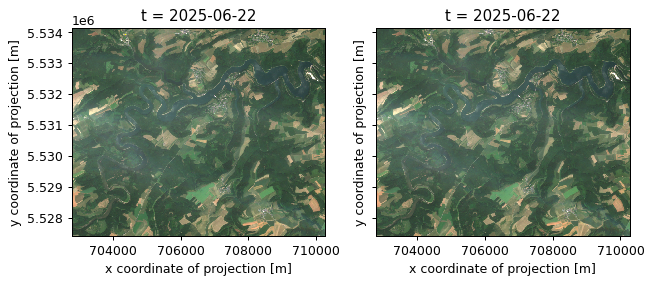

In [68]:
# Convert xarray DataSet to a (bands, t, x, y) DataArray
data = ds[["B04", "B03", "B02"]].to_array(dim="bands")

fig, axes = plt.subplots(ncols=2, figsize=(8, 3), dpi=90, sharey=True)
data[{"t": 0}].plot.imshow(vmin=0, vmax=2000, ax=axes[0])
data[{"t": -1}].plot.imshow(vmin=0, vmax=2000, ax=axes[1]);

In [ ]:
b01 = ds.sel(bands="B01").squeeze()
b08 = ds.sel(bands="B08").squeeze()

In [ ]:
ratio = b01 / b08

In [ ]:
threshold_mask = (ratio < 0.5)
filtered = ratio.where(threshold_mask) 

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(8, 3), dpi=90, sharey=True)
data[{"t": 0}].plot.imshow(vmin=0, vmax=2000, ax=axes[0])
data[{"t": -1}].plot.imshow(vmin=0, vmax=2000, ax=axes[1]);